# ÌôòÍ≤Ω Î≥ÄÏàò ÏÑ∏ÌåÖ

In [2]:
# cv2: OpenCV ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú, Ïã§ÏãúÍ∞Ñ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†ÑÏùÑ Î™©Ï†ÅÏúºÎ°ú Ìïú ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç ÎùºÏù¥Î∏åÎü¨Î¶¨
# numpy(NumPy): ÌñâÎ†¨Ïù¥ÎÇò ÎåÄÍ∑úÎ™® Îã§Ï∞®Ïõê Î∞∞Ïó¥ÏùÑ ÏâΩÍ≤å Ï≤òÎ¶¨Ìï† Ïàò ÏûàÎèÑÎ°ù ÏßÄÏõêÌïòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ Ïô∏ÏóêÎèÑ ÏàòÏπò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Ìö®Ïú®Ï†ÅÏúºÎ°ú Íµ¨ÌòÑÎêú Í∏∞Îä•ÏùÑ Ï†úÍ≥µ
# torch: PyTorch. Îî•Îü¨Îãù Î∞è ÌÖêÏÑú Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨. Ïù∏Í≥µÏßÄÎä• Î™®Îç∏ÏùÑ ÎßåÎì§Í±∞ÎÇò Î∂àÎü¨ÏôÄ Ï∂îÎ°†ÌïòÎäî ÎèÑÍµ¨
# torchvision: Ïù¥ÎØ∏ÏßÄ Î≥ÄÌôò Î∞è Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌïú torchvisionÏùò transform Î™®Îìà
# deeplabv3_resnet101: ÏÇ¨Ï†Ñ ÌïôÏäµÎêú DeepLabV3 Î™®Îç∏. Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÎ•òÌïòÎèÑÎ°ù ÌïôÏäµÎêú Î™®Îç∏
# matplotlib: ÌååÏù¥Ïç¨ ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç Ïñ∏Ïñ¥ Î∞è ÏàòÌïôÏ†Å ÌôïÏû• NumPy ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©Ìïú ÌîåÎ°úÌåÖ ÎùºÏù¥Î∏åÎü¨Î¶¨Î°ú, Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÎèÑÍµ¨

import cv2
import os
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt

print('Ïäù=3')

Ïäù=3


Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: (1079, 1079, 3)


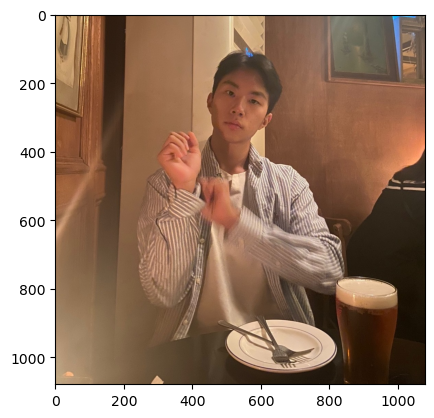

In [3]:
# Ï§ÄÎπÑÌïú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º Ïù¥Ïö©ÌïòÏó¨, Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏùΩÏùå
# cv2.imread(Í≤ΩÎ°ú): Í≤ΩÎ°úÏóê Ìï¥ÎãπÌïòÎäî Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏùΩÏñ¥ÏÑú Î≥ÄÏàòÏóê Ï†ÄÏû•

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/human_segmentation/images/my_image.png")
img_orig = cv2.imread(img_path)

print(f"Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {img_orig.shape}")

# cv2.cvtColor(ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ, ÏÉâÏÉÅ Î≥ÄÌôò ÏΩîÎìú): ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅ Ï±ÑÎÑêÏùÑ Î≥ÄÍ≤Ω
# cv2.COLOR_BGR2RGB: Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Ï±ÑÎÑêÏùÑ Î≥ÄÍ≤Ω (BGR ÌòïÏãùÏùÑ RGB ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
# plt.imshow(): Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥ÎØ∏ÏßÄÏùò ÌòïÏãùÏúºÎ°ú ÌëúÏãú, ÏûÖÎ†•ÏùÄ RGB(A) Îç∞Ïù¥ÌÑ∞ ÌòπÏùÄ 2D Ïä§ÏπºÎùº Îç∞Ïù¥ÌÑ∞
# plt.show(): ÌòÑÏû¨ Ïó¥Î†§ÏûàÎäî Î™®Îì† figureÎ•º ÌëúÏãú (Ïó¨Í∏∞ÏÑú figureÎäî Ïù¥ÎØ∏ÏßÄ, Í∑∏ÎûòÌîÑ Îì±)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# dEEPLAB Î™®Îç∏ Ï§ÄÎπÑ
model = deeplabv3_resnet101(pretrained=True).eval()

/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # Î™®Îç∏ ÏûÖÎ†• ÌÅ¨Í∏∞ (Í≥†Ï†ï)
    T.ToTensor(),
])

In [6]:
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [7]:
# Î™®Îç∏Ïóê Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•ÌïòÍ∏∞

%time
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# ÏõêÎ≥∏ ÌÅ¨Í∏∞Î°ú Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

CPU times: user 4 Œºs, sys: 1e+03 ns, total: 5 Œºs
Wall time: 11 Œºs


==================================================================================

PASCAL VOD Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§.

Î™®Îç∏ÎßàÎã§ ÌïôÏäµÏãúÌÇ® Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Í≤∞Í¥èÍ∞íÏù¥ Îã¨ÎùºÏßÄÎØÄÎ°ú Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÏº∞Îäî ÏßÄ 'ÌôïÏù∏'ÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌïòÎã§.

In [8]:
#pascalvoc Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®Ï¢ÖÎ•ò
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)
# BackgroundÎ•º Ï†úÏô∏ÌïòÎ©¥ 20Í∞úÏùò ÌÅ¥ÎûòÏä§Í∞Ä ÏûàÎã§.

21

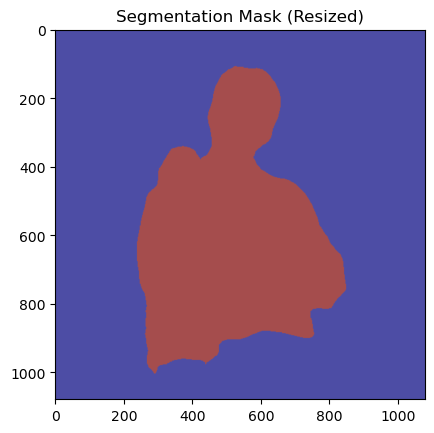

In [9]:
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [10]:
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([ 0, 15], dtype=uint8)

In [11]:
for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

background
person


In [12]:
#Ïª¨Îü¨Îßµ ÎßåÎì§Í∏∞
# Ï∂úÎ†•Î¨ºÏùÑ ÏÇ¥Ìé¥Î≥¥Í∏∞

colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # ÏÉùÏÑ±Ìïú 20Í∞úÏùò Ïª¨Îü¨Îßµ Ï∂úÎ†•

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
colormap[15] #Ïª¨Îü¨Îßµ 15Ïóê Ìï¥ÎãπÌïòÎäî Î∞∞Ïó¥ Ï∂úÎ†• (pacalvocÏóê LABEL_NAMES 15Î≤àÏß∏Ïù∏ ÏÇ¨Îûå)

array([192, 128, 128])

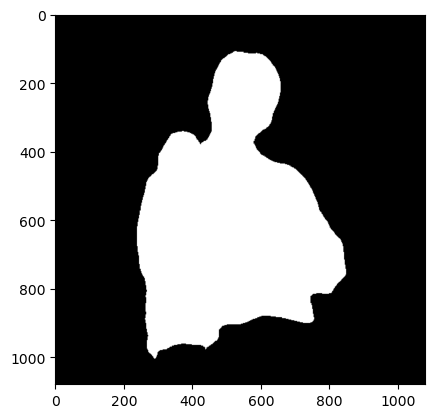

In [14]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏòàÏ∏°Îêú classÍ∞Ä ÏÇ¨ÎûåÏù¥ÎùºÎ©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ ÎêúÎã§.

# 1Í≥º 0Ïóê Í∞ÅÍ∞Å 255Î•º Í≥±ÌïòÏòÄÏúºÎØÄÎ°ú ÏÇ¨ÎûåÏúºÎ°ú ÏòàÏ∏°Îêú ÌîΩÏÖÄÏùÄ 255, Í∑∏Î†áÏßÄ ÏïäÏùÄ ÌîΩÏÖÄÏùÄ 0
# cmap Í∞íÏùÑ Î≥ÄÍ≤ΩÌïòÎ©¥ Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÌôïÏù∏Ïù¥ Í∞ÄÎä•.

seg_map = (output_predictions_resized == 15)  # ÌÅ¥ÎûòÏä§ ID 15 (ÏÇ¨Îûå)
img_mask = seg_map.astype(np.uint8) * 255  # 255 Í∞íÏúºÎ°ú Î≥ÄÌôò
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # ÌùëÎ∞±ÏúºÎ°ú ÌëúÏãú
plt.show()

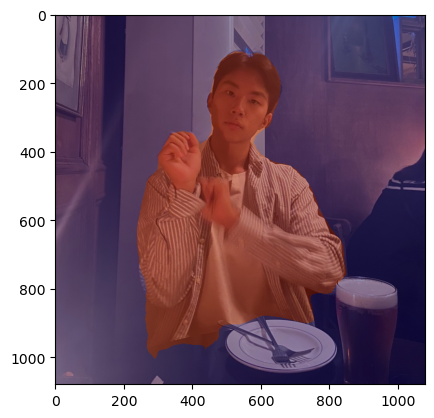

In [15]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ≥∏Îã§.
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Î∞∞Í≤Ω ÌùêÎ¶¨Í≤å ÌïòÍ∏∞ blur()

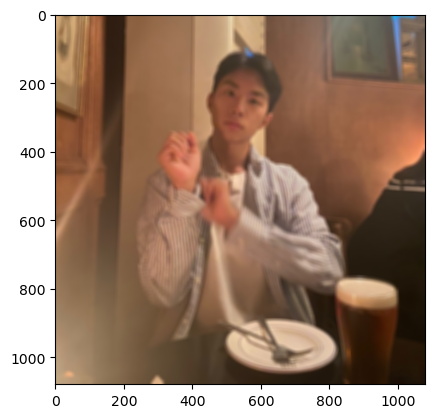

In [16]:
# (13,13)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
# Îã§ÏñëÌïòÍ≤å Î∞îÍøîÏÑú blur Í∞ïÎèÑÎ•º Ï°∞Ï†àÌï† Ïàò ÏûàÎã§.
img_orig_blur = cv2.blur(img_orig, (13, 13))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

bitwise_not Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∞òÏ†ÑÎêúÎã§.

ÏõêÎûò ÎßàÏä§ÌÅ¨ÏóêÏÑúÎäî Î∞∞Í≤ΩÏù¥ 0, ÏÇ¨ÎûåÏù¥ 255ÏòÄÏúºÎãà bitwise_not Ïó∞ÏÇ∞ÏùÑ ÌïòÍ≥† ÎÇòÎ©¥ Î∞∞Í≤ΩÏùÄ 255, ÏÇ¨ÎûåÏùÄ 0Ïù¥ ÎêòÍ≤å Îê®.

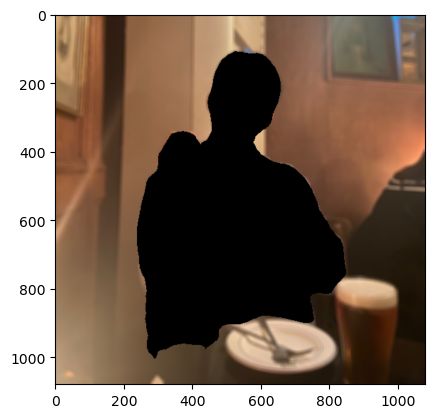

In [17]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∞òÏ†ÑÎê©ÎãàÎã§. Î∞∞Í≤ΩÏù¥ 0 ÏÇ¨ÎûåÏù¥ 255 ÏòÄÏúºÎÇò
# Ïó∞ÏÇ∞ÏùÑ ÌïòÍ≥† ÎÇòÎ©¥ Î∞∞Í≤ΩÏùÄ 255 ÏÇ¨ÎûåÏùÄ 0Ïù¥ ÎêúÎã§.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î∞∞Í≤ΩÎßå ÏûàÎäî ÏòÅÏÉÅÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§.
# 0Í≥º Ïñ¥Îñ§ ÏàòÎ•º bitwise_and Ïó∞ÏÇ∞ÏùÑ Ìï¥ÎèÑ 0Ïù¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê
# ÏÇ¨ÎûåÏù¥ 0Ïù∏ Í≤ΩÏö∞ÏóêÎäî ÏÇ¨ÎûåÏù¥ ÏûàÎçò Î™®Îì† ÌîΩÏÖÄÏù¥ 0Ïù¥ ÎêúÎã§. Í≤∞Íµ≠ ÏÇ¨ÎûåÏù¥ ÏÇ¨ÎùºÏßÄÍ≥† Î∞∞Í≤ΩÎßå ÎÇ®Í≤å Îê®!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### Í≥ºÏ†ú: ÏïÑÏõÉÌè¨Ïª§Ïã± Ìö®Í≥ºÍ∞Ä Ï†ÅÏö©Îêú Ïù∏Î¨ºÎ™®Îìú ÏÇ¨ÏßÑ
Ïù¥Ï†ú ÌùêÎ¶∞ Î∞∞Í≤ΩÍ≥º ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÎ•º Ìï©ÏπòÍ∏∞Îßå ÌïòÎ©¥ ÎêúÎã§.

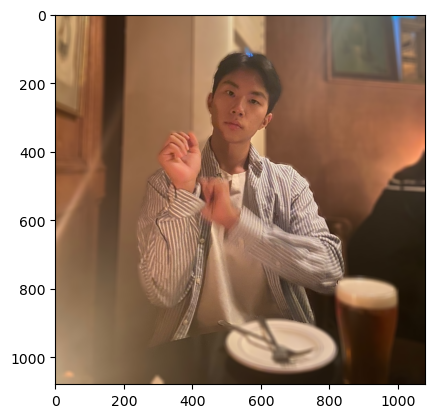

In [18]:
# np.where(Ï°∞Í±¥, Ï∞∏ÏùºÎïå, Í±∞ÏßìÏùºÎïå)
# ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Í∞Ä 255Ïù∏ Î∂ÄÎ∂ÑÎßå ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† Ïò§Í≥†
# ÏïÑÎãå ÏòÅÏó≠ÏùÄ Î∏îÎü¨Îêú Ïù¥ÎØ∏ÏßÄ Í∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

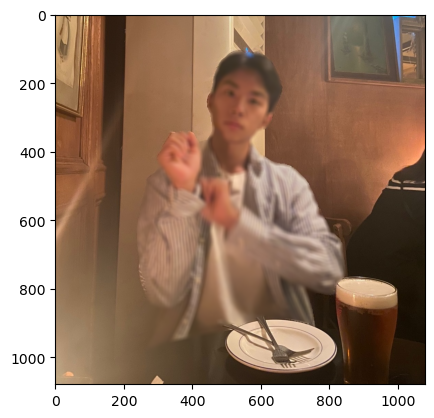

In [19]:
# ÏÇ¨Îûå Î∂ÄÎ∂ÑÏùÑ Î∏îÎü¨Î°ú, Î∞∞Í≤Ω Î∂ÄÎ∂ÑÏùÑ ÏõêÎ≥∏ÏúºÎ°ú Ï∂úÎ†•ÌïòÍ∏∞.
# img_mask_color ÏòµÏÖòÏùÑ Ï†ÅÏ†àÌûà Ï°∞Ï†ïÌï¥Ï£ºÍ≥†, img_orig, img_orig_blur Î•º ÌôúÏö©ÌïòÎ©¥ ÎêúÎã§.
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# Ïù∏Î¨º Î™®Îìú Î¨∏Ï†úÏ†ê Ï∞æÍ∏∞

ÏõêÎ≥∏ Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: (225, 224, 3)
Î∞∞Í≤Ω(ÏÇ¨Îßâ) Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: (194, 259, 3)


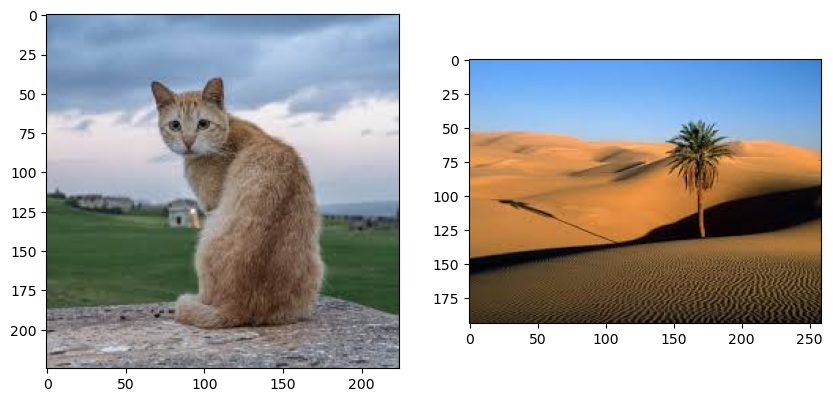

In [30]:
# Í≥†ÏñëÏù¥ÏôÄ ÏÇ¨Îßâ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
home_dir = os.getenv('HOME')
cat_img_path = os.path.join(home_dir, "work/human_segmentation/images/cat.png")
sand_img_path = os.path.join(home_dir, "work/human_segmentation/images/sand.png")

cat_img = cv2.imread(cat_img_path)
sand_img = cv2.imread(sand_img_path)

cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
sand_img = cv2.cvtColor(sand_img, cv2.COLOR_BGR2RGB)

print(f"ÏõêÎ≥∏ Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {cat_img.shape}")
print(f"Î∞∞Í≤Ω(ÏÇ¨Îßâ) Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞: {sand_img.shape}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cat_img)

plt.subplot(1, 2, 2)
plt.imshow(sand_img)

plt.show()

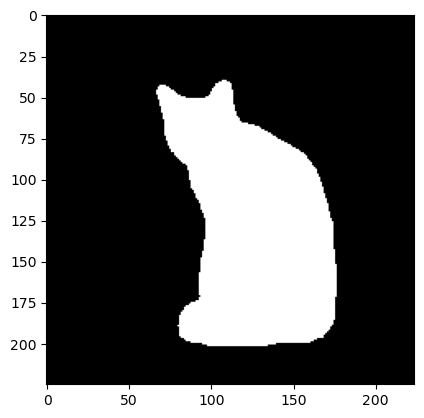

In [39]:
target_class_id = unique_classes[-1]

seg_map = (output_predictions_resized == target_class_id)
img_mask = seg_map.astype(np.uint8) * 255

plt.imshow(img_mask, cmap='gray')
plt.show()

In [41]:
# 1. Î∞∞Í≤Ω ÌÅ¨Í∏∞Î•º Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê ÎßûÏ∂§
sand_img_resized = cv2.resize(sand_img, (cat_img.shape[1], cat_img.shape[0]))

# 2. ÎßàÏä§ÌÅ¨Î•º 3Ï±ÑÎÑêÎ°ú Î≥ÄÌôò
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 3. shape ÌôïÏù∏
print(cat_img.shape)         
print(sand_img_resized.shape) 
print(img_mask_color.shape)   

# 4. np.where Ï†ÅÏö©
result_img = np.where(img_mask_color == 255, cat_img, sand_img_resized)


(225, 224, 3)
(225, 224, 3)
(225, 224, 3)


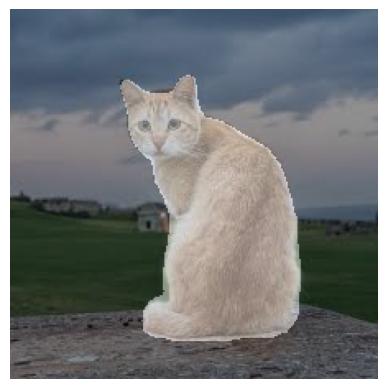

In [49]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©ÏπòÍ∏∞
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÑ.

cat_img = cat_img.astype(np.uint8)

img_show = cv2.addWeighted(cat_img, 0.6, color_mask, 0.4, 0.0)

plt.imshow(img_show)
plt.axis('off')
plt.show()

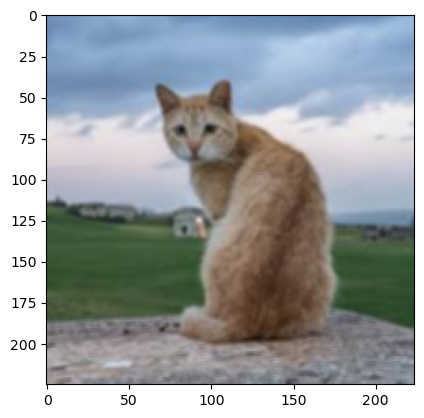

In [51]:
# (13,13)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
# Îã§ÏñëÌïòÍ≤å Î∞îÍøîÎ≥¥ÏÑ∏Ïöî
cat_img_blur = cv2.blur(cat_img, (3, 3))

plt.imshow(cat_img_blur)
plt.show()

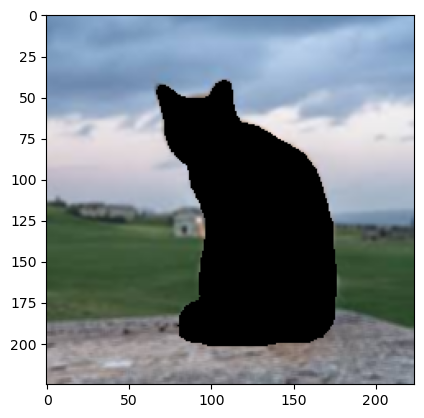

In [52]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∞òÏ†Ñ. 
# Î∞∞Í≤ΩÏù¥ 0 Í≥†ÏñëÏù¥Í∞Ä 255Ïù¥ÎØÄÎ°ú, Ïó∞ÏÇ∞ÏùÑ ÌïòÍ≥† ÎÇòÎ©¥ Î∞∞Í≤ΩÏùÄ 255 Í≥†ÏñëÏù¥Í∞Ä 0
img_bg_mask = cv2.bitwise_not(img_mask_color)

# 0Ïù∏ Í≤ΩÏö∞ÏóêÎäî ÌîºÏÇ¨Ï≤¥Í∞Ä ÏûàÎçò Î™®Îì† ÌîΩÏÖÄÏù¥ 0Ïù¥ ÎêòÏñ¥ Î∞∞Í≤ΩÎßå ÎÇ®ÎäîÎã§.
cat_img_bg_blur = cv2.bitwise_and(cat_img_blur, img_bg_mask)
plt.imshow(cat_img_bg_blur)
plt.show()

### Í≥ºÏ†ú: ÏïÑÏõÉÌè¨Ïª§Ïã± Ìö®Í≥ºÍ∞Ä Ï†ÅÏö©Îêú ÎèôÎ¨º ÏÇ¨ÏßÑ

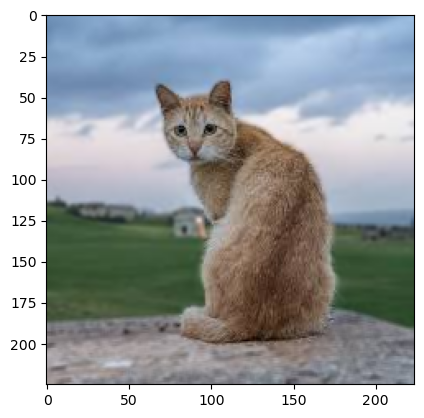

In [53]:
cat_img_concat = np.where(img_mask_color==255, cat_img, cat_img_bg_blur)

plt.imshow(cat_img_concat)
plt.show()

In [34]:
model = deeplabv3_resnet101(pretrained=True).eval()

transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # Î™®Îç∏ ÏûÖÎ†• ÌÅ¨Í∏∞
    T.ToTensor(),
])

input_tensor = transform(cat_img).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

print(f"Ï∂îÎ°† ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ (Before Resize): {output_predictions.shape}")

Ï∂îÎ°† ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ (Before Resize): (520, 520)


In [35]:
# ÎßàÏä§ÌÅ¨Î•º ÏõêÎ≥∏ ÌÅ¨Í∏∞Î°ú Resize
output_predictions_resized = cv2.resize(output_predictions, (cat_img.shape[1], cat_img.shape[0]), interpolation=cv2.INTER_NEAREST)

print(f"Ï∂îÎ°† ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ (After Resize): {output_predictions_resized.shape}")

Ï∂îÎ°† ÎßàÏä§ÌÅ¨ ÌÅ¨Í∏∞ (After Resize): (225, 224)


In [36]:
unique_classes = np.unique(output_predictions_resized)
print(f"ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ID: {unique_classes}")

ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ ID: [0 8]


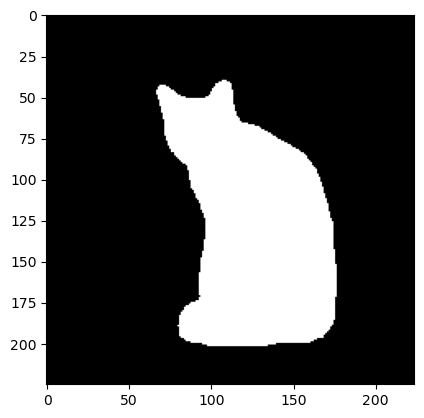

In [37]:
target_class_id = unique_classes[-1]

seg_map = (output_predictions_resized == target_class_id)
img_mask = seg_map.astype(np.uint8) * 255

plt.imshow(img_mask, cmap='gray')
plt.show()

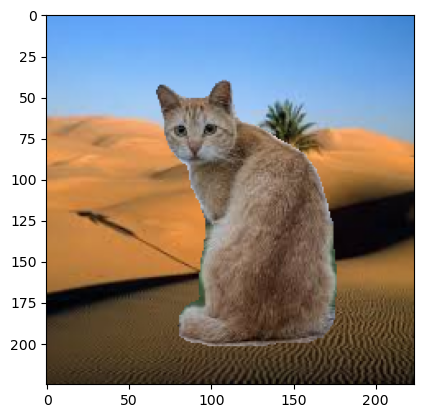

In [38]:
# Î∞∞Í≤ΩÏùÑ Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Ïóê ÎßûÏ∂§
sand_img_resized = cv2.resize(sand_img, (cat_img.shape[1], cat_img.shape[0]))

# Í≥†ÏñëÏù¥ Î∂ÄÎ∂ÑÎßå ÎÇ®Í∏∞Í≥† Î∞∞Í≤Ω Ï†ÅÏö©
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)  # 3Ï±ÑÎÑê Î≥ÄÌôò
result_img = np.where(img_mask_color == 255, cat_img, sand_img_resized)  # ÎßàÏä§ÌÅ¨ Í∏∞Î∞ò Ìï©ÏÑ±

plt.imshow(result_img)
plt.show()

### Í≥ºÏ†ú: ÏÇ¨ÏßÑÏóêÏÑú Î¨∏Ï†úÏ†ê ÏßÄÏ†ÅÌïòÍ∏∞

1. Í≥†ÏñëÏù¥Ïùò Ïô∏Í≥ΩÎ∂ÄÎ∂ÑÏóê Ï¥àÎ°ù Î∞∞Í≤ΩÏù¥ Ïó¨Ï†ÑÌûà ÎÇ®ÏïÑÏûàÎã§.
2. Í≥†ÏñëÏù¥Î•º Î∞îÎùºÎ¥§ÏùÑ Îïå ÏôºÏ™ΩÏóê ÏúÑÏπòÌïú Í∑ÄÍ∞Ä Ï°∞Í∏à ÏûòÎ†∏Îã§.
3. Í≥†ÏñëÏù¥Î•º Î∞îÎùºÎ¥§ÏùÑ Îïå ÏôºÏ™ΩÏóê ÏúÑÏπòÌïú ÏàòÏóºÏù¥ ÏûòÎ†∏Îã§.

<img src="human_segmentation/images/problem_result.png" width="400">


ÏúÑ Î¨∏Ï†úÎ•º Îã§Î•¥Í≤å ÏÑ§Î™ÖÌïòÏûêÎ©¥, Îã§Ïùå 3Í∞ÄÏßÄ Î¨∏Ï†úÎ°ú Ï†ïÏùòÌï† Ïàò ÏûàÎã§.

- ÎßàÏä§ÌÅ¨ Í≤ΩÍ≥ÑÍ∞Ä Î∂ÄÏ†ïÌôïÌïòÎã§.(Í∑ÄÍ∞Ä ÏûòÎ¶¨Í≥†, Ïù¥Ï†Ñ Î∞∞Í≤ΩÏù¥ ÎÇ®ÎäîÎã§)
- ÏûëÏùÄ Ïò§Î∏åÏ†ùÌä∏ ÎàÑÎùΩ(ÏàòÏóº)
- Î∞∞Í≤ΩÍ≥º ÌîºÏÇ¨Ï≤¥ Í≤ΩÍ≥ÑÍ∞Ä Î∂àÎ™ÖÌôïÌïòÎã§.

### Ìï¥Í≤∞Ï±Ö Ï†úÏïà

1. ÌõÑÏ≤òÎ¶¨ Í≤ΩÍ≥ÑÎ•º Î∂ÄÎìúÎüΩÍ≤å ÌïòÎäî Guided Filter ÏÇ¨Ïö©

ü§î‚ÄòÍ∞ÄÏù¥Îìú Ïù¥ÎØ∏ÏßÄ(guide)‚ÄôÎ•º Ï∞∏Í≥†Ìï¥ ÌäπÏ†ï Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÄÎìúÎüΩÍ≤å(smooth) ÎßåÎìúÎäî ÌïÑÌÑ∞
- Ïó¨Í∏∞ÏÑú guide ‚Üí cat_img (ÏõêÎ≥∏ Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑ)
- src ‚Üí mask_float (DeepLab Í∞ôÏùÄ segmentation Î™®Îç∏Ïù¥ ÎßåÎì† ÎßàÏä§ÌÅ¨)
- Guided FilterÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ(cat_img) Î•º Ï∞∏Í≥†Ìï¥ÏÑú, Í≤ΩÍ≥ÑÏÑ†ÏùÑ ÏÇ¥Î†§Ï£ºÎ©¥ÏÑú ÎßàÏä§ÌÅ¨Ïùò ÎÇ¥Î∂ÄÎ•º Î∂ÄÎìúÎüΩÍ≤å Ïä§Î¨¥Îî©ÌïúÎã§.

ü§î ÏõêÎ¶¨ Ïù¥Ìï¥ÌïòÍ∏∞
- guide image(cat)ÏùÑ Î≥¥Í≥† ÏÉâÏù¥ Í∏âÎ≥ÄÌïòÎ©¥ Í≤ΩÍ≥ÑÎ•º Ïù∏ÏãùÌïúÎã§.
- Í≤ΩÍ≥ÑÎäî Î≥¥Ï°¥ÌïòÍ≥†, Í≤ΩÍ≥Ñ ÏïàÏ™ΩÏùÑ Î∂ÄÎìúÎüΩÍ≤å Ïä§Î¨¥Îî©ÌïúÎã§.
- Ïù¥Î•º ÌÜµÌï¥ Ìó§Ïñ¥ÎùºÏù∏, ÏàòÏóº, Í∑Ä Í∞ôÏùÄ Í≤ΩÍ≥ÑÎ•º ÏßÄÌÇ¨ Ïàò ÏûàÎã§.

2. Î™®Îç∏ ÍµêÏ≤¥ÌïòÍ∏∞

DeepLab v3Îäî EncoderÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥ÎØ∏ÏßÄÎ•º feature mapÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, Îã®ÏàúÌûà upsamplingÌñàÎã§.

Í∑∏Îü¨Îã§Î≥¥ÎãàÍπå, Í≤ΩÍ≥ÑÍ∞Ä ÌùêÎ¶øÌïòÍ±∞ÎÇò ÎîîÌÖåÏùºÏóê ÏïΩÌïòÎã§.

Î∞òÎ©¥ DecoderÎ•º Ï∂îÍ∞ÄÌïú DeepLab v3+Îäî DecoderÏóêÏÑú convolutionÍ≥º upsamplingÏúºÎ°ú Îçî ÏÑ†Î™ÖÌïòÍ≤å segmentationÌïúÎã§.

Ïù¥Î°ú Ïù∏Ìï¥ v3+Î•º ÏÇ¨Ïö©ÌïòÎ©¥ Îçî Ï†ïÍµêÌïú segmentationÏù¥ Í∞ÄÎä•Ìï¥Ïßà Í≤ÉÏù¥Îã§.